<a href="https://colab.research.google.com/github/hr7git/20250714_count_TAX/blob/main/Knou_AI_deep_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 필요한 패키지 불러오기

In [1]:
from tensorflow import keras
from keras import datasets, models
from keras import Sequential, optimizers
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt  #시각화
import numpy as np

[2] MNIST 필기체 숫자 데이터세트 준비

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

# 픽셀 값을 0~1 사이로 정규화
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

# Conv2D에 맞게 데이터 reshape
train_imgs = train_imgs.reshape(60000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[3] 모델 구성 후 요약 정보 출력

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))   #첫번째는 input shape 지정
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))     # 64개의 뉴런
model.add(Dense(10, activation='softmax'))  # 10개의 뉴런
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

[4] 모델 컴파일

In [4]:
model.compile(optimizer=optimizers.SGD(0.01, momentum=0.9),     # 확률적경사하강법 SGD 이용 , 학습률 , 미니배치=default 32개
              loss='sparse_categorical_crossentropy',           # 손실함수  : 출력10개이면 1개만 1  - 분류 one-hot encoded label
              metrics=['accuracy'])                             # 모델 평가 : 정확도

[5] 모델 훈련

In [5]:
model.fit(train_imgs, train_labels, epochs=5)       # 6만개영상 , 6만개 어떤 값 , 5번 반복횟수 = epochs

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8522 - loss: 0.4674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0564
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9882 - loss: 0.0389
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0279
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0.0207


[6] 테스트 집합에 대한 인식 결과 구하기

In [11]:
result = model.predict(test_imgs)           # 테스트 이미지로 모델을 추론
test_num = 110                              # test_num = 테스트하고자 하는 순서의 값을 대입
print(result[test_num])                            # test_num번째 영상에 대한 결과
print('인식 결과: ', np.argmax(result[test_num]))      # 가장큰값을 찾는다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[8.7162590e-11 3.6280151e-10 3.0738665e-08 1.6192795e-06 9.9305231e-10
 2.0651678e-09 4.5322367e-11 1.1421184e-12 9.9999833e-01 3.9900975e-08]
인식 결과:  8


[7] 첫 25개의 이미지와 인식 결과 디스플레이

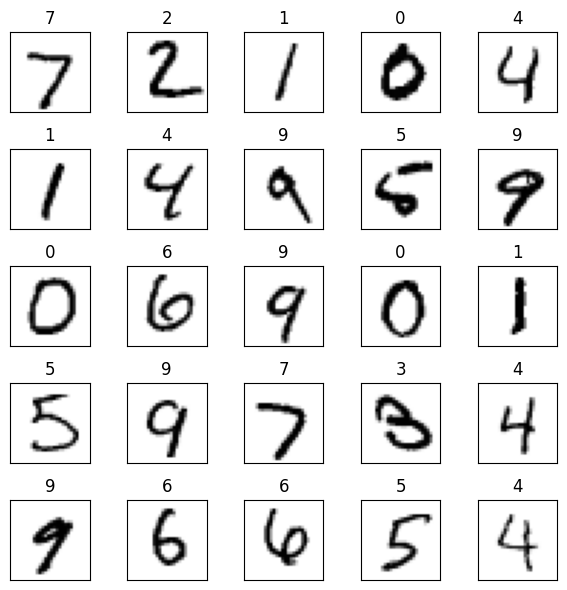

In [13]:
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(25):                 #  0-25
    plt.subplot(5, 5,i+1)
    plt.xticks([])      # 눈금 출력 안한다
    plt.yticks([])
    plt.grid(False)
    timg = test_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)    # imshow 이미지를 출력하는 함수
    plt.title('{}'.format(np.argmax(result[i])))
plt.show()

[8] 오인식 이미지 리스트를 구함

In [14]:
# 오인식 이미지 리스트를 구함
err_imgs, err_labels = [], []
for i in range(10000):
    lbl = np.argmax(result[i])
    if lbl != test_labels[i]:
        err_imgs.append(test_imgs[i])
        err_labels.append('{}-->{}'.
                          format(test_labels[i], lbl))
print('인식률  = ', (10000 - len(err_labels)) / 10000)

인식률  =  0.9907


[9] 첫 25개의 오인식 이미지 디스플레이

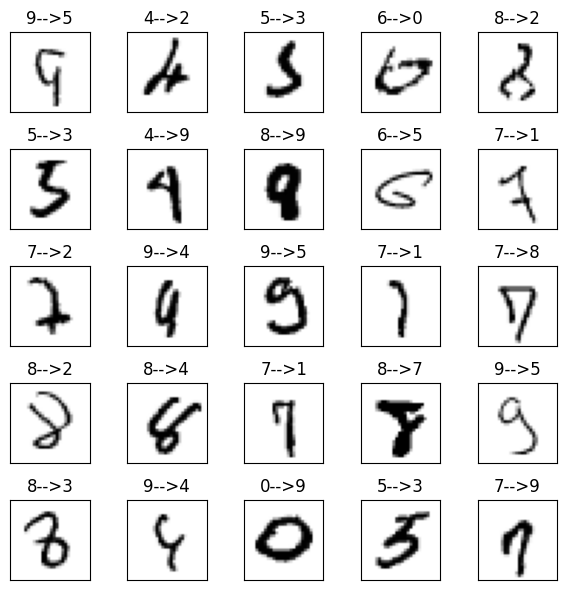

In [15]:
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(min(25, len(err_labels))):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    timg = err_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)
    plt.title(err_labels[i])
plt.show()